In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [181]:
df = pd.read_csv('results.csv')

nn_df = df[df['name'] == 'nn'].reset_index()
gc_df = df[df['name'] == 'gc'].reset_index()
ls_random_df = df[df['name'] == 'ls-random'].reset_index()
ls_nn_df = df[df['name'] == 'ls-nn'].reset_index()
ils_df = df[df['name'] == 'ils'].reset_index()
ea_df = df[df['name'] == 'ea'].reset_index()

df.head(n=5)

,name,instance_name,primary_graph,secondary_graph,time_ns,primary_cost,secondary_cost,total_cost
0,gc,kroA100,30-79-88-41-7-55-96-74-91-0-62-5-48-89-18-3-64...,11-26-85-19-56-6-8-54-82-33-45-28-2-42-34-61-5...,115813855,13910,16503,30413
1,gc,kroA100,58-73-20-71-9-83-35-37-23-17-78-89-48-5-62-46-...,28-45-2-42-13-47-99-70-40-33-82-54-29-38-95-77...,35637779,11284,19000,30284
2,gc,kroA100,77-51-95-4-36-38-29-47-99-70-13-28-45-2-42-40-...,79-30-88-41-55-96-74-7-91-0-62-5-48-89-18-3-64...,45147668,14176,15594,29770
3,gc,kroA100,35-37-23-17-83-9-71-20-73-58-98-78-89-48-5-62-...,54-82-33-11-26-85-19-6-8-56-86-50-60-24-80-67-...,12872146,14195,18882,33077
4,gc,kroA100,19-11-26-85-34-61-59-76-56-6-8-86-50-60-24-80-...,38-95-77-51-4-36-12-32-75-94-81-49-43-1-63-39-...,8339697,14038,20021,34059


In [182]:
def get_data(solver_df, instance):
    instance_df = solver_df[solver_df['instance_name'] == instance]
    instance_df = instance_df.reset_index()
    
    tc = instance_df['total_cost']
    best_cost = instance_df.iloc[tc.idxmin('column')]['total_cost']
    worst_cost = instance_df.iloc[tc.idxmax('column')]['total_cost']
    avg_cost = tc.mean()
    
    time = instance_df['time_ns']
    best_time = instance_df.iloc[time.idxmin('column')]['time_ns'] / 1000000
    worst_time = instance_df.iloc[time.idxmax('column')]['time_ns'] / 1000000
    avg_time = time.mean() / 1000000
    
    best_primary_graph = instance_df.iloc[tc.idxmin('column')]['primary_graph']
    best_secondary_graph = instance_df.iloc[tc.idxmin('column')]['secondary_graph']

    return {
        'instance': instance,
        'best_result': {
            'primary': best_primary_graph,
            'secondary': best_secondary_graph
        },
        'best_cost': best_cost,
        'worst_cost': worst_cost,
        'avg_cost': avg_cost,
        'best_time': best_time,
        'worst_time': worst_time,
        'avg_time': avg_time
    }

In [183]:
get_data(ea_df, 'kroA150')

{'instance': 'kroA150',
 'best_result': {'primary': '78-136-87-15-21-93-69-52-133-105-89-48-5-62-0-129-91-7-41-121-79-30-88-132-137-147-141-104-66-107-57-27-92-130-46-108-90-97-22-44-31-10-14-16-140-58-73-20-71-112-9-83-35-37-23-17-103-101-110-98-126-18-74-96-142-55-138-118-3-64-65-128-25-123-117',
  'secondary': '40-70-99-47-13-2-45-28-131-111-106-120-29-100-38-95-77-51-4-36-146-12-32-145-102-75-94-125-81-115-49-43-113-143-63-39-53-1-72-67-84-134-139-116-6-8-56-144-86-124-50-60-24-80-68-33-82-54-148-11-26-85-34-149-61-59-76-109-19-119-114-122-42-127-135'},
 'best_cost': 30033,
 'worst_cost': 37732,
 'avg_cost': 34291.81,
 'best_time': 5571.657713,
 'worst_time': 14555.650318,
 'avg_time': 6933.28595979}

In [174]:
results = {
    'NN kroA100': get_data(nn_df, 'kroA100'),
    'NN kroA150': get_data(nn_df, 'kroA150'),
    'GC kroA100': get_data(gc_df, 'kroA100'),
    'GC kroA150': get_data(gc_df, 'kroA150'),
    'LS Random kroA100': get_data(ls_random_df, 'kroA100'),
    'LS Random kroA150': get_data(ls_random_df, 'kroA150'),
    'LS NN kroA100': get_data(ls_nn_df, 'kroA100'),
    'LS NN kroA150': get_data(ls_nn_df, 'kroA150'),
    'ILS kroA100': get_data(ils_df, 'kroA100'),
    'ILS kroA150': get_data(ils_df, 'kroA150'),
    'EA kroA100': get_data(ea_df, 'kroA100'),
    'EA kroA150': get_data(ea_df, 'kroA150')
}

In [175]:
COLUMNS_COST = ['Min Cost', 'Max Cost', 'Avg Cost']
COLUMNS_TIME = ['Min Time [ms]', 'Max Time [ms]', 'Avg Time [ms]']

def table(data_dict, key, columns):
    series = []
    indexes = []
    
    for solver, values in data_dict.items():
        best = values['best_{}'.format(key)]
        worst = values['worst_{}'.format(key)]
        avg = values['avg_{}'.format(key)]
        
        indexes.append(solver)
        series.append(pd.Series([best, worst, avg], index=columns))
    
    return pd.DataFrame(series, index=indexes)

def parse_vector(vector):
    results = vector.split('-')
    return " - ".join(results)

def vectors(data_dict):
    for solver, values in data_dict.items():
        print('Solver: {}'.format(solver))
        print(parse_vector(values['best_result']['primary']))
        print()
        print(parse_vector(values['best_result']['secondary']))
        print()

In [176]:
table(results, 'cost', COLUMNS_COST)

,Min Cost,Max Cost,Avg Cost
NN kroA100,24458.0,32775.0,29202.78
NN kroA150,30664.0,38806.0,35038.48
GC kroA100,28450.0,36401.0,31729.88
GC kroA150,35039.0,43548.0,38458.19
LS Random kroA100,43370.0,69950.0,54133.23
LS Random kroA150,62194.0,85295.0,71767.55
LS NN kroA100,47754.0,47754.0,47754.00
LS NN kroA150,73733.0,73733.0,73733.00
ILS kroA100,42989.0,50411.0,47713.75
ILS kroA150,59896.0,61045.0,61033.51


In [177]:
table(results, 'time', COLUMNS_TIME)

,Min Time [ms],Max Time [ms],Avg Time [ms]
NN kroA100,1.324470,16.957106,3.463314
NN kroA150,3.229817,4.356971,3.425506
GC kroA100,3.653104,115.813855,9.061932
GC kroA150,10.662524,12.045759,11.073706
LS Random kroA100,53.155598,280.841086,90.544357
LS Random kroA150,200.552580,471.029548,294.563146
LS NN kroA100,81.763279,141.734193,89.455478
LS NN kroA150,271.416264,314.174419,284.051172
ILS kroA100,7090.464706,11180.122152,7766.326834
ILS kroA150,27494.544112,44598.965537,32325.368920


In [178]:
vectors(results)

Solver: NN kroA100
62 - 5 - 48 - 89 - 9 - 83 - 71 - 20 - 73 - 58 - 16 - 14 - 10 - 31 - 90 - 97 - 22 - 44 - 46 - 0 - 91 - 7 - 41 - 88 - 30 - 79 - 55 - 96 - 74 - 18 - 52 - 78 - 17 - 23 - 37 - 35 - 98 - 93 - 21 - 15 - 87 - 69 - 65 - 64 - 3 - 25 - 66 - 27 - 92 - 57

68 - 72 - 49 - 43 - 1 - 53 - 39 - 63 - 80 - 24 - 60 - 50 - 86 - 8 - 6 - 56 - 19 - 11 - 26 - 85 - 34 - 61 - 59 - 76 - 54 - 82 - 33 - 28 - 45 - 2 - 42 - 13 - 70 - 40 - 99 - 47 - 51 - 77 - 95 - 4 - 36 - 32 - 75 - 12 - 94 - 81 - 38 - 29 - 84 - 67

Solver: NN kroA150
101 - 110 - 103 - 37 - 23 - 17 - 136 - 78 - 105 - 89 - 48 - 5 - 62 - 0 - 129 - 91 - 7 - 41 - 121 - 79 - 30 - 88 - 132 - 137 - 147 - 141 - 104 - 66 - 107 - 57 - 27 - 92 - 130 - 46 - 108 - 90 - 97 - 22 - 44 - 31 - 10 - 14 - 16 - 140 - 58 - 73 - 20 - 71 - 112 - 9 - 83 - 35 - 98 - 126 - 133 - 52 - 87 - 15 - 21 - 93 - 69 - 65 - 64 - 3 - 96 - 142 - 55 - 138 - 74 - 18 - 118 - 117 - 123 - 25 - 128

70 - 40 - 99 - 47 - 13 - 2 - 45 - 28 - 131 - 111 - 106 - 120 - 29 - 100 - 38 - 9

In [179]:
import os

def nodes_list(result):
    return [int(x) for x in result.split('-')]

def read_nodes_file(instance):
    with open(os.path.join('data/', '{}.tsp'.format(instance)), 'r') as fp:
        nodes_dict = {}
        for line in fp:
            idx, x, y = line.split(' ')
            nodes_dict[int(idx) - 1] = {'x': int(x), 'y': int(y)}
        return nodes_dict
            

def charts(data_dict):
    for solver, values in data_dict.items():
        instance_name = values['instance']
        nodes_file = read_nodes_file(instance_name)
        
        nodes_primary = nodes_list(values['best_result']['primary'])
        nodes_secondary = nodes_list(values['best_result']['secondary'])
        
        plt.figure(figsize=(20,10))

        # TODO: I need x and y
        
        # Primary
        x = [nodes_file[node]['x'] for node in nodes_primary]
        y = [nodes_file[node]['y'] for node in nodes_primary]
        
        for i in range(0, len(x)-1):
            plt.plot(x[i:i+2], y[i:i+2], 'o-', markersize = 5, color = 'r', linewidth=2)
        plt.plot([x[0], x[-1]],[y[0], y[-1]], 'o-', markersize = 5, color = 'r', linewidth=2)

        # Secondary
        x = [nodes_file[node]['x'] for node in nodes_secondary]
        y = [nodes_file[node]['y'] for node in nodes_secondary]
        for i in range(0, len(x)-1):
            plt.plot(x[i:i+2], y[i:i+2], 'o-', markersize = 5, color = 'b', linewidth=2)
        plt.plot([x[0], x[-1]],[y[0], y[-1]], 'o-', markersize = 5, color = 'b', linewidth=2)

        for key, row in nodes_file.items():
            plt.text(row['x'], row['y'], key , fontsize=12)
        
        plt.savefig(os.path.join('plots', '{}.png'.format(solver)), bbox_inches='tight')

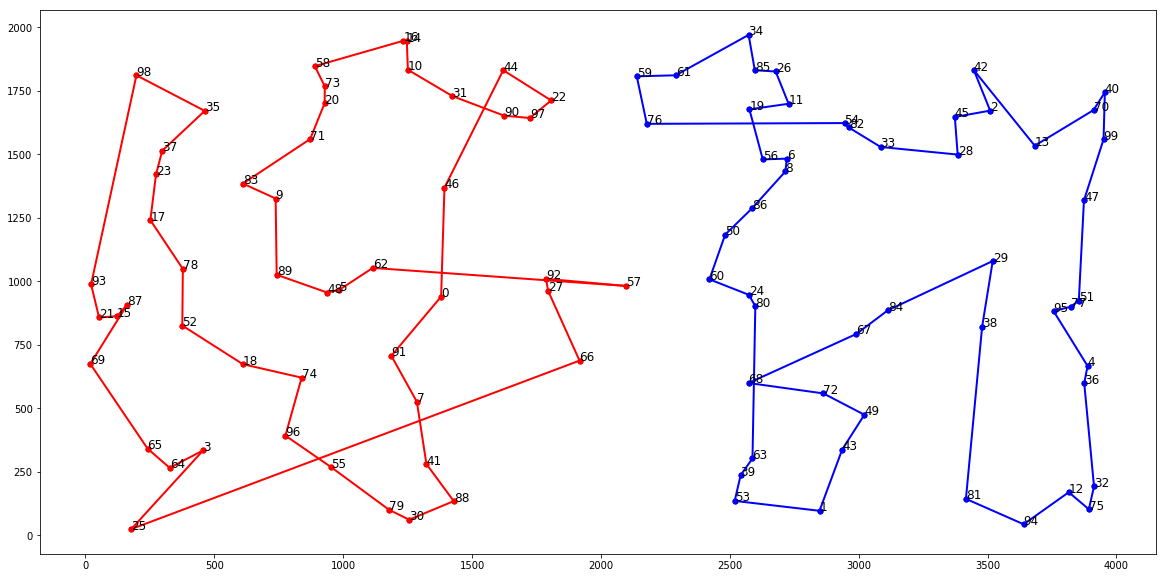

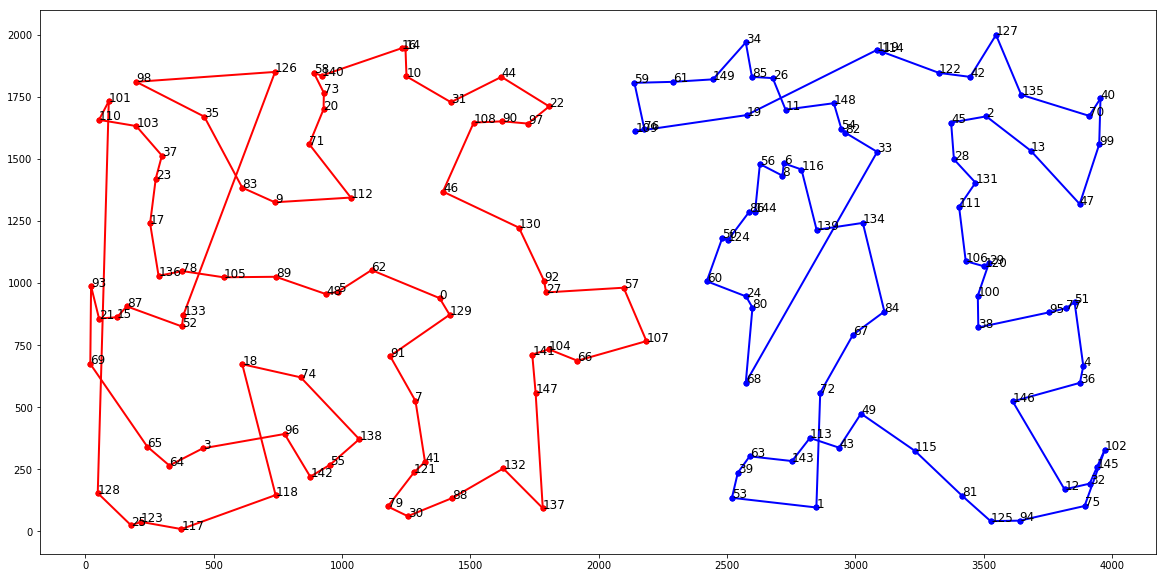

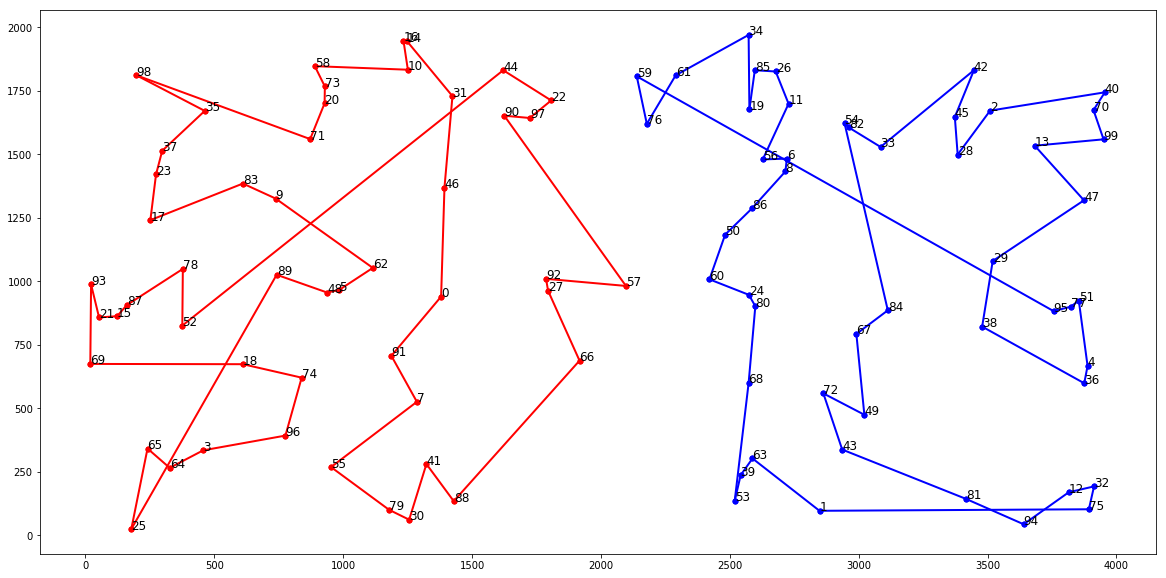

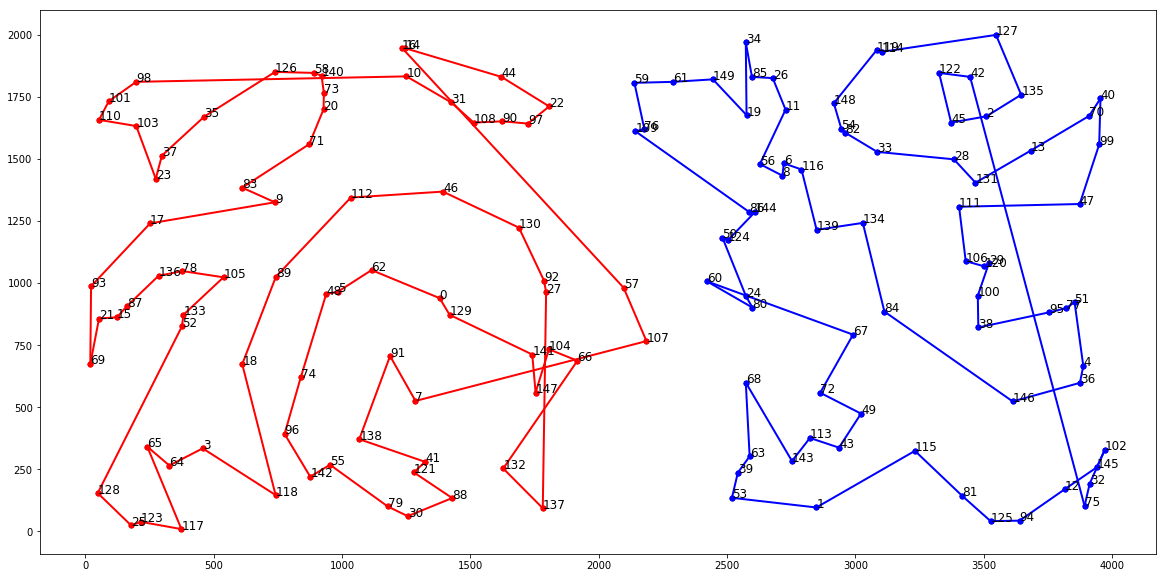

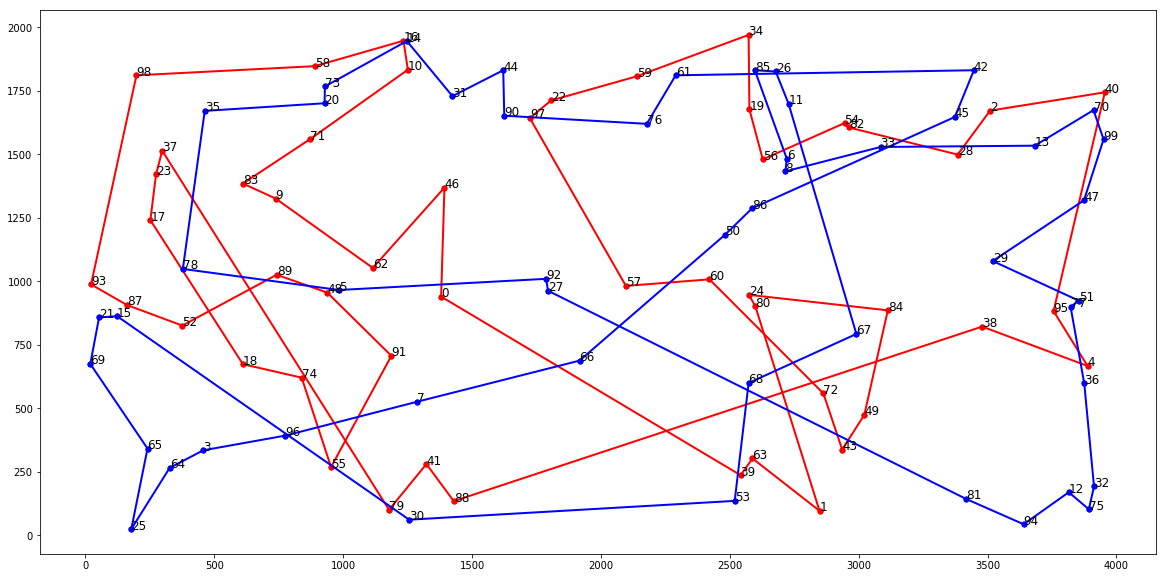

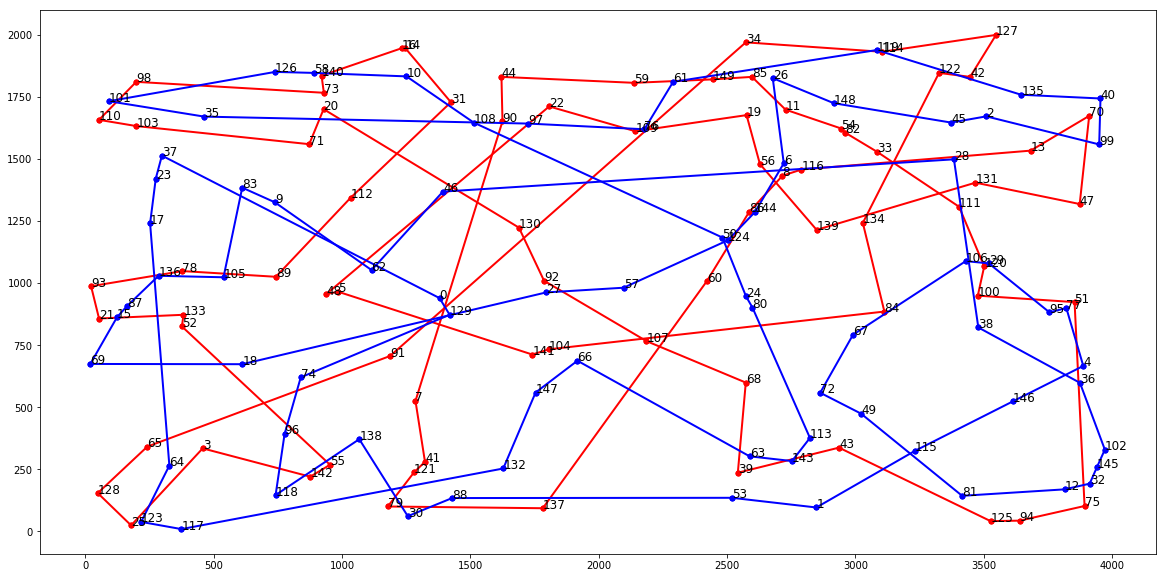

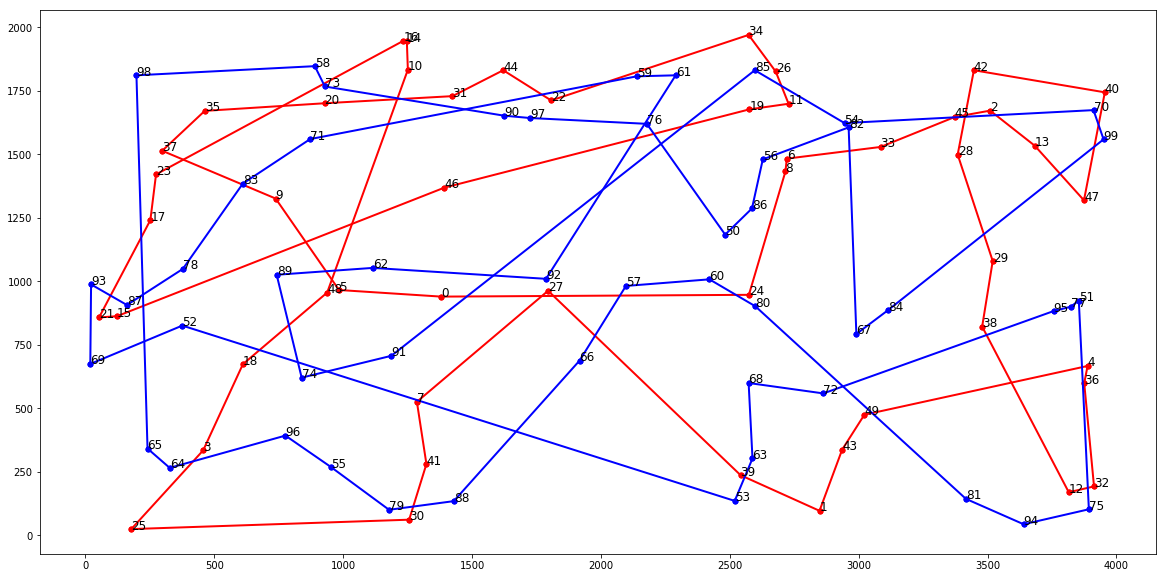

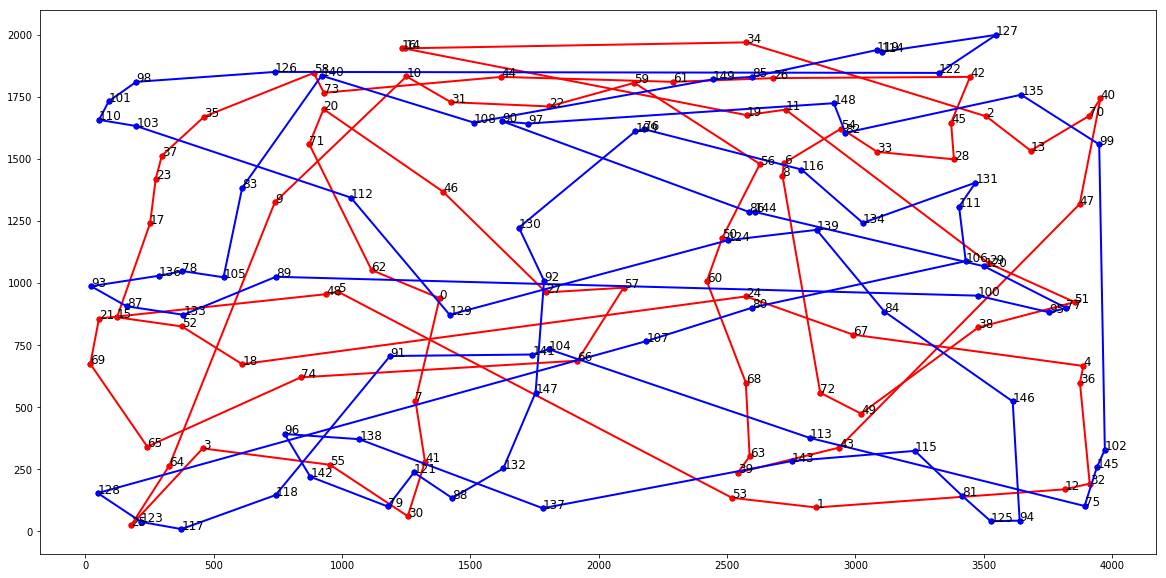

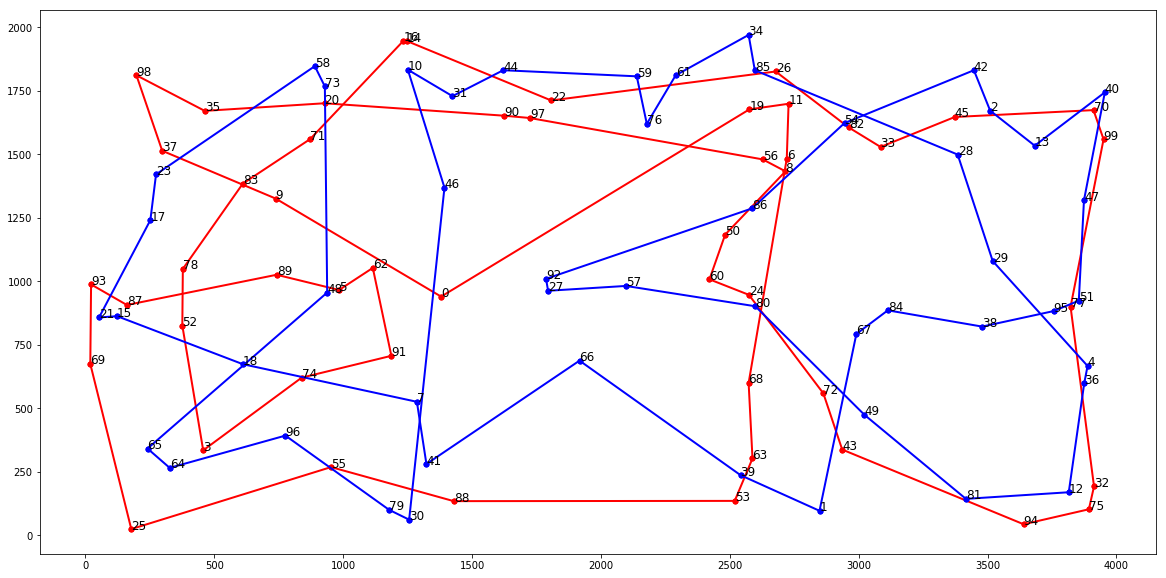

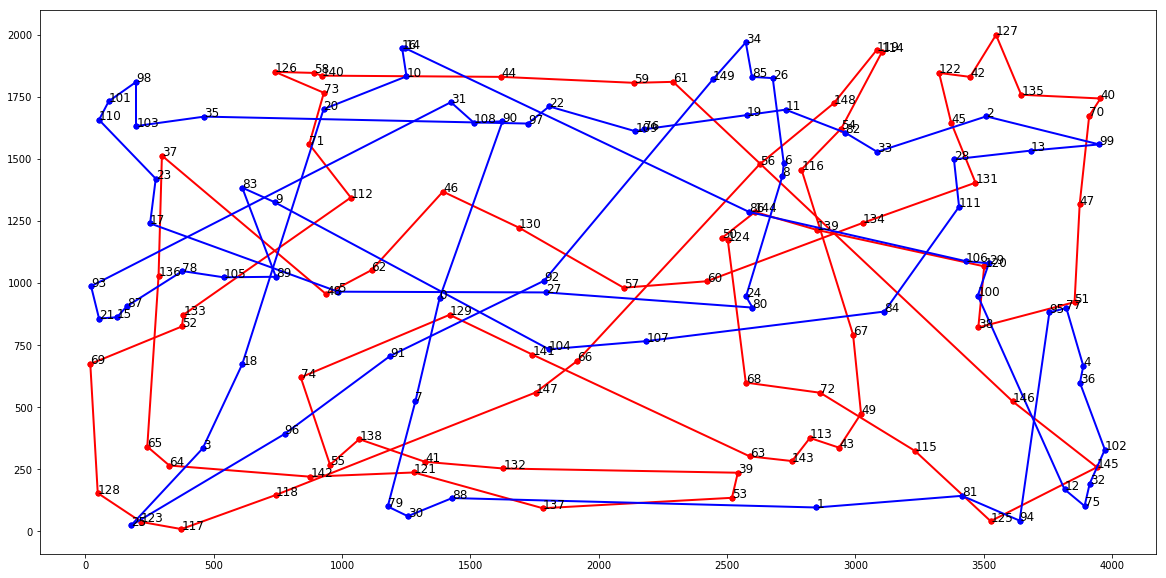

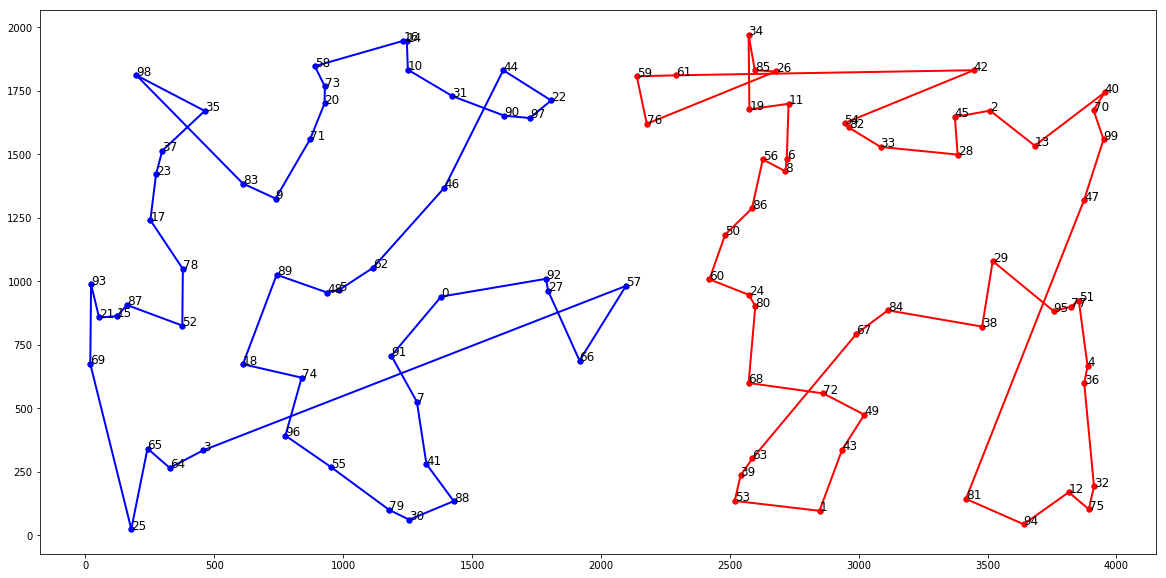

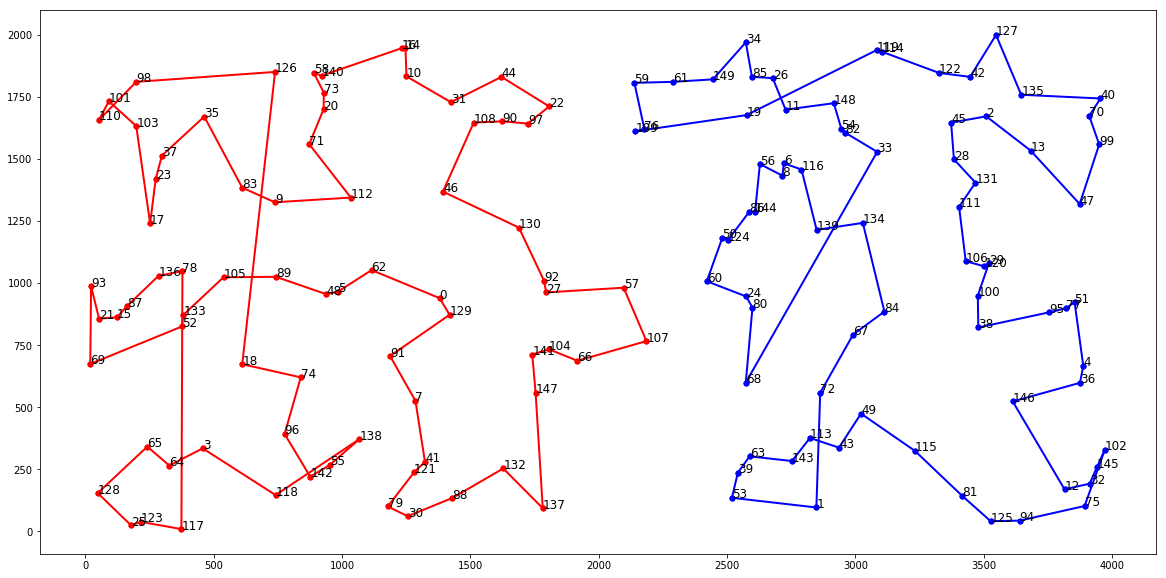

In [180]:
charts(results)